In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Loading the .mat file
from scipy.io import loadmat
data = loadmat("Indian_pines_corrected.mat")               
print(data.keys())                            #cheking what variables are inside the file 
                                              #the actual hyperspectral cube is stored in "indian_pines_corrected"

dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_corrected'])


In [2]:
#Extracting the hyperspectral cube
cube = data['indian_pines_corrected']
print(cube.shape)

(145, 145, 200)


In [3]:
def contrast_stretch(image):
    
    # converting to float
    image = image.astype(np.float32)

    R_min = np.min(image)
    R_max = np.max(image)

    # Stretching formula
    S = (image - R_min)/(R_max - R_min + 1e-12)  # this output is already in [0, 1]

    return S


Applying to single band

In [4]:
band_50 = cube[:, :, 50]
cs_band_50 = contrast_stretch(band_50)

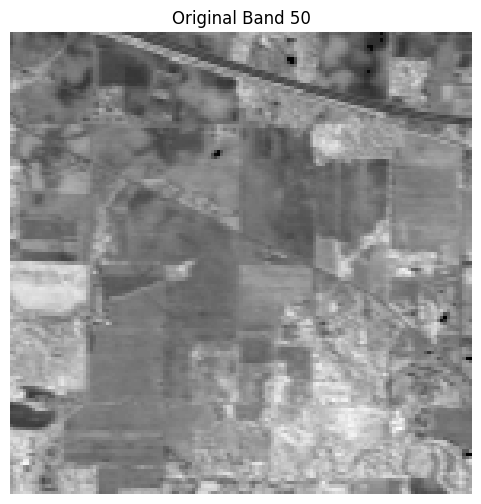

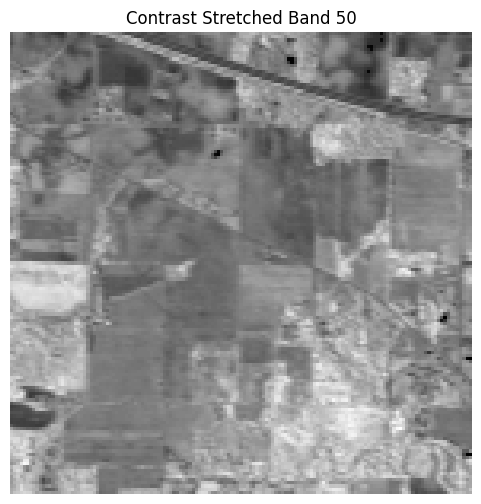

In [5]:
plt.figure(figsize=(6,6))
plt.title("Original Band 50")
plt.imshow(band_50, cmap='gray')
plt.axis('off')

plt.figure(figsize=(6,6))
plt.title("Contrast Stretched Band 50")
plt.imshow(cs_band_50, cmap='gray')
plt.axis('off')

plt.show()

Applying Contrast Stretching to the average of all bands

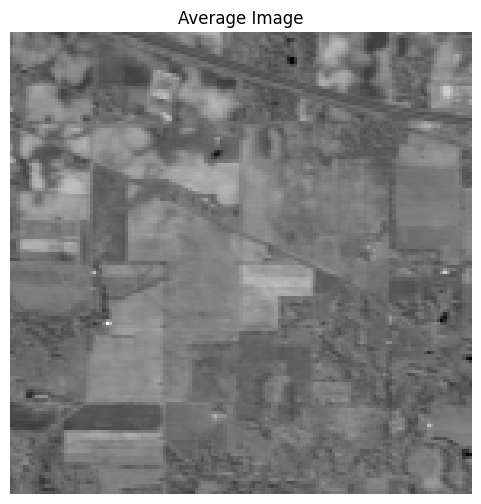

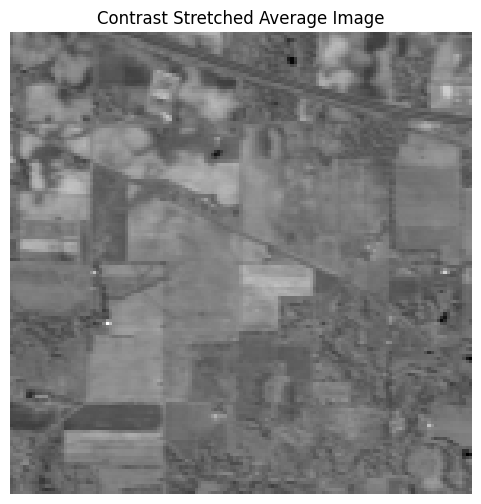

In [8]:
avg_image = np.mean(cube, axis=2)
cs_avg = contrast_stretch(avg_image)
plt.figure(figsize=(6,6))
plt.title("Average Image")
plt.imshow(avg_image, cmap='gray')
plt.axis('off')

plt.figure(figsize=(6,6))
plt.title("Contrast Stretched Average Image")
plt.imshow(cs_avg, cmap='gray')
plt.axis('off')

plt.show()